In [1]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("file.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MTEQR
TK
YADSILTTK
SPYEATETIR
IR
LSQVK
LLNK
DFYLLFK
ELANLK
R
NYAQQLR
K
IIAENEDITK
ILNAQMIESNVLTPQEMSAFR
FNSLGELR
NVWDTVIEELK
SDLK
SSTEYYNTLDQQVVR
ELK
ESVENNTSWR
ESK
DLHSK
LSK
NAASIEHYSK
NNENSSHLEEAR
R
QWDQQSPYLFELFETIDYNR
LDTLK
NCMLR
FQTSFSDYLLNTTK
ECETVMTK
FLAFEPQSEIDR
FAK
DASQYNFQLSSSSK
EVVPNNASPASATGARPVSVSNGAANTER
EK
K
SPQK
DK
R
K
SAFGNIGHR
LASASSSLTHNDLMNNEFSDSTNNSSLK
SK
K
SSHTLR
SK
VGSIFGR
NK
TK
NK
R
QQQSSSNSHIQASITETPNNSSTR
VSSTATSSIYQK
QR
RPTYSSSK
SNNWTPGEASDTPPLPPHATPK
NVDAPVTADTPPAQTFTPSEVPPSTPQQSSPPTAK
EPDSSNLPK
TVPISISQPPLQPQSK
TKPLPVEPASPSISLPTATVDNQPSGQVDSRPLHIR
APALPPSR
K
QNFIHNR
DSQLYDSLPNHGSGATPTSSSLSSIPQERPVSTLSSQITGELR
ELNPQATGSSTSLVGQSLFQHSSLDTSQFGLNASIAEVLNASFK
DGMLQNSQLIGEIALNYLPNSVMNSPLPIGINLR
INNGAK
FEK
VILNQAFIER
VAPEEFK
VNPSFIDSR
TLGAIK
YSIK
EPIAPIVIHPVWR
FESHQASVVLTVK
MSPSLPDEISQIVIEDLVVFVNIDGANATSALSKPQGSFSK
EK
K
R
ITWR
FK
EPVVLTR
NGEGQR
LIAR
FITDGLAHESAK
GVITK
FTISETDNVALPHSGAGSGITLTCQELDENNPFGGEWLDVNTK
R
TLTTGNYHGLA


In [27]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectrum = exp.getSpectra()

In [23]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("file.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MTEQR has 25 peaks.
b2-H2O1+ is generated at m/z 84.044390626271
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H2O1+ is generated at m/z 213.08698484957097
b2+ is generated at m/z 233.095440707171
y2-C1H2N1O1+ is generated at m/z 259.1638921047711
y2-C1H2N2+ is generated at m/z 261.15573310477106
y2-H3N1+ is generated at m/z 286.1509820728711
y2+ is generated at m/z 303.1775311685711
b4-H2O1+ is generated at m/z 341.145563104771
b4-H3N1+ is generated at m/z 342.129579072871
b3+ is generated at m/z 362.138034930471
y3-C1H2N1O1+ is generated at m/z 388.2064863280711
y3-C1H2N2+ is generated at m/z 390.19832732807106
y3-H2O1+ is generated at m/z 414.20956032807106
y3-H3N1+ is generated at m/z 415.1935762961711
y3+ is generated at m/z 432.2201253918711
y4-C1H2N1O1+ is generated at m/z 489.25416555137105
b4+ is generated at m/z 490.1966

In [28]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
  
        

Number of matched peaks: 157
ion	theo. m/z	observed m/z
y2++	2	144.60514686552102	145.06076972197098
y1+	1	175.118952913371	175.118952913371
b2+	1	203.06624978577102	203.066249785771
y3++	2	209.12644397717102	209.128454977171
b4++	2	222.60808442932102	223.064808515771
y4++	2	237.63717602502103	238.11861894527095
y5++	2	288.161015636671	288.15539913667106
y2+	1	288.203017264271	288.203017264271
b5++	2	304.13974907287104	304.140417009071
b3+	1	331.124828040971	331.124828040971
y6++	2	344.703047812121	345.0863337071709
b6++	2	361.65322115262103	361.244548487571
b7++	2	405.169235732371	405.172841232371
y7++	2	408.732336939721	409.15401896237097
y3+	1	417.245611487571	417.24561148757107
b4+	1	444.208892391871	444.2088923918711
y8++	2	452.248351519471	452.25036251947097
b8++	2	461.711267907821	461.27584861517096
y4+	1	474.26707558327104	474.26707558327104
y9++	2	495.764366099221	496.18604812187095
b9++	2	510.237650019471	510.23471245567094
y10++	2	552.306398274671	552.302792774671
b10++	2	56

In [29]:
print(str(result[matchpeaks.index(max(matchpeaks))]))

DSQLYDSLPNHGSGATPTSSSLSSIPQERPVSTLSSQITGELR


In [30]:
print(len(spectrum)) 

2


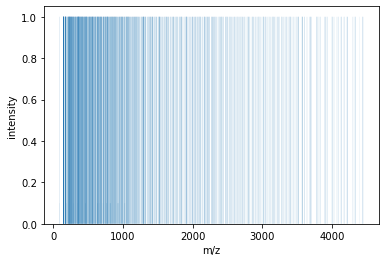

In [31]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

40.018175498671
6934.325783934568


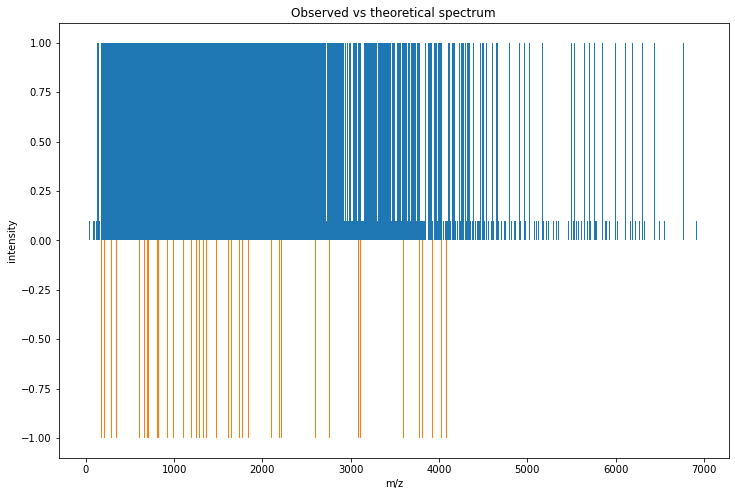

In [32]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)


Number of matched peaks: 157
ion	theo. m/z	observed m/z
y2++	2	144.60514686552102	145.06076972197098
y1+	1	175.118952913371	175.118952913371
b2+	1	203.06624978577102	203.066249785771
y3++	2	209.12644397717102	209.128454977171
b4++	2	222.60808442932102	223.064808515771
y4++	2	237.63717602502103	238.11861894527095
y5++	2	288.161015636671	288.15539913667106
y2+	1	288.203017264271	288.203017264271
b5++	2	304.13974907287104	304.140417009071
b3+	1	331.124828040971	331.124828040971
y6++	2	344.703047812121	345.0863337071709
b6++	2	361.65322115262103	361.244548487571
b7++	2	405.169235732371	405.172841232371
y7++	2	408.732336939721	409.15401896237097
y3+	1	417.245611487571	417.24561148757107
b4+	1	444.208892391871	444.2088923918711
y8++	2	452.248351519471	452.25036251947097
b8++	2	461.711267907821	461.27584861517096
y4+	1	474.26707558327104	474.26707558327104
y9++	2	495.764366099221	496.18604812187095
b9++	2	510.237650019471	510.23471245567094
y10++	2	552.306398274671	552.302792774671
b10++	2	56

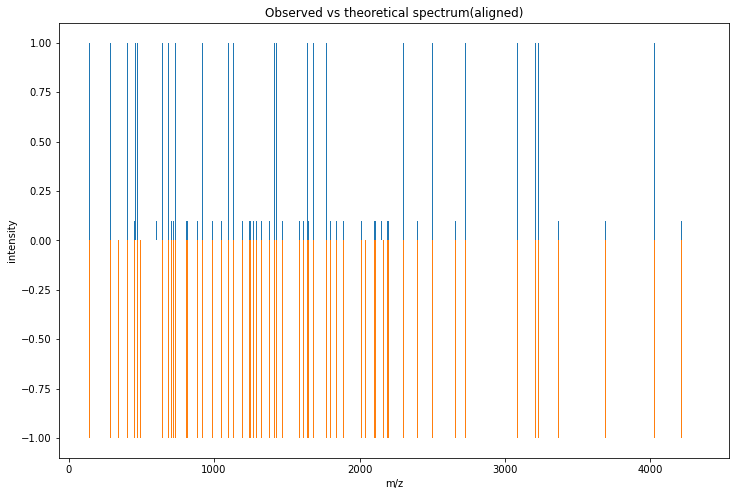

In [38]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
    title = 'Observed vs theoretical spectrum(aligned)'
    mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)
